In [413]:
import tdt
import matplotlib.pyplot as plt
import trompy as tp
import numpy as np
import pickle
%matplotlib inline

In [506]:
figdpi = 100

In [414]:
filename="C:\\Users\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Photometry - GRAB-DA in NAc\\NAD_2_and_3.xls"
datafolder="C:\\Data\\NAD\\medfiles\\"
rows, header=tp.metafilereader(filename)

File is excel file. Making csv metafile first


In [415]:
NR_male = []
NR_female = []

PR_male = []
PR_female = []

NR_all = []
PR_all = []

for row in rows:
        if row[4] == "NR" and row[3]=="male":
            if row[2] not in NR_male:
                NR_male.append(row[2])

for row in rows:
        if row[4] == "PR" and row[3]=="male":
            if row[2] not in PR_male:
                PR_male.append(row[2])

for row in rows:
        if row[4] == "NR" and row[3]=="female":
            if row[2] not in NR_female:
                NR_female.append(row[2])
                
for row in rows:
        if row[4] == "PR" and row[3]=="female":
            if row[2] not in PR_female:
                PR_female.append(row[2])
for row in rows:
        if row[4] == "PR":
            if row[2] not in PR_all:
                PR_all.append(row[2])
for row in rows:
        if row[4] == "NR":
            if row[2] not in NR_all:
                NR_all.append(row[2])


In [416]:
PR_all

['NAD23', 'NAD24', 'NAD25', 'NAD26', 'NAD34']

In [417]:
def remove_nans (list_of_mice):
    new =[]
    for value in list_of_mice:   
        if np.isnan(value) == False:
            new.append(value)
    return new

In [418]:
def get_licks_per_trial(mouse, session):
    temp_licks = []

    for row in rows:
        if row[2] == mouse:
            if row [6] == session:
                licks, sipper_in, sipper_out = tp.medfilereader(datafolder+row[1], varsToExtract=["e", "i", "j"],  remove_var_header=True)
                temp = []
                
                for start, end in zip(sipper_in, sipper_out):
                    temp.append([lick for lick in licks if (lick > start) and (lick < end)])

                for lick in temp:
                    temp2 = (len(lick))
                    temp_licks.append(temp2)
    
    licks_per_trial = temp_licks
    return licks_per_trial

In [419]:
def get_mean_licks_per_trial(mouse, session):
    temp_licks = []

    for row in rows:
        if row[2] == mouse:
            if row [6] == session:
                licks, sipper_in, sipper_out = tp.medfilereader(datafolder+row[1], varsToExtract=["e", "i", "j"],  remove_var_header=True)
                temp = []
                
                for start, end in zip(sipper_in, sipper_out):
                    temp.append([lick for lick in licks if (lick > start) and (lick < end)])

                for lick in temp:
                    temp2 = (len(lick))
                    temp_licks.append(temp2)
    
    mean_licks_per_trial = np.mean(temp_licks)
    return mean_licks_per_trial

In [420]:
def get_misses_per_session(mouse, session):
    temp_misses = 0
    temp_mean_latency = []
    temp_latency = []
    
    for row in rows:
        if row[2] == mouse:
            if row [6] == session:
                licks, sipper_in, sipper_out = tp.medfilereader(datafolder+row[1], varsToExtract=["e", "i", "j"],  remove_var_header=True)
                temp = []
                
                for start, end in zip(sipper_in, sipper_out):
                    temp.append([lick for lick in licks if (lick > start) and (lick < end)])
                    
                for start, trial in zip(sipper_in, temp):
                    if len(trial) > 0:
                        temp_latency.append(trial[0] - start)
                        temp_mean_latency.append(np.mean(trial[0] - start))
                    else:
                        temp_misses += 1
    
    misses_per_session = temp_misses
    return misses_per_session

In [421]:
def get_latency_per_trial(mouse, session):
    temp_latency = []    
    temp_misses = 0
    
    for row in rows:
        if row[2] == mouse:
            if row [6] == session:
                licks, sipper_in, sipper_out = tp.medfilereader(datafolder+row[1], varsToExtract=["e", "i", "j"],  remove_var_header=True)
                temp = []
                
                for start, end in zip(sipper_in, sipper_out):
                    temp.append([lick for lick in licks if (lick > start) and (lick < end)])
                    
                for start, trial in zip(sipper_in, temp):
                    if len(trial) > 0:
                        temp_latency.append(trial[0] - start)
                    else:
                        temp_misses += 1
    
    latency_per_trial = temp_latency
    return latency_per_trial

In [422]:
def get_mean_latency_per_session(mouse, session):
    temp_mean_latency = []
    temp_misses = 0
    temp_latency = []
    
    for row in rows:
        if row[2] == mouse:
            if row [6] == session:
                licks, sipper_in, sipper_out = tp.medfilereader(datafolder+row[1], varsToExtract=["e", "i", "j"],  remove_var_header=True)
                temp = []
                
                for start, end in zip(sipper_in, sipper_out):
                    temp.append([lick for lick in licks if (lick > start) and (lick < end)])
                    
                for start, trial in zip(sipper_in, temp):
                    if len(trial) > 0:
                        temp_latency.append(trial[0] - start)
                    else:
                        temp_misses += 1
                temp_mean_latency = np.mean(temp_latency)
    
    mean_latency_per_session = temp_mean_latency
    return mean_latency_per_session

In [423]:
NR_Licks_per_Session_1 = []
NR_Licks_per_Trial_1 = []
NR_Mean_Licks_per_Trial_1 = []
NR_misses_1 = []
NR_hits_1 = []
NR_latency_1 = []
NR_mean_latency_1= []
NR_licks_per_trial_taken_1 = []

for mouse in NR_all:
    trials = get_licks_per_trial(mouse, 1)
    NR_Licks_per_Trial_1.append(trials)
    total_licks = sum(trials)
    NR_Licks_per_Session_1.append(total_licks)
    
    trial_mean = get_mean_licks_per_trial(mouse, 1)
    NR_Mean_Licks_per_Trial_1.append(trial_mean)

    misses = get_misses_per_session(mouse, 1)
    NR_misses_1.append(misses)
    
    hits = 40 - misses
    NR_hits_1.append(hits)
    
    latency = get_latency_per_trial(mouse, 1)
    NR_latency_1.append(latency)
    
    mean_latency = get_mean_latency_per_session(mouse, 1)
    NR_mean_latency_1.append(mean_latency)
    
    if hits != 0:
        licks_per_trial_taken = total_licks / hits
        NR_licks_per_trial_taken_1.append(licks_per_trial_taken)

In [424]:
NR_Licks_per_Session_1 = []
NR_Licks_per_Trial_1 = []
NR_Mean_Licks_per_Trial_1 = []
NR_misses_1 = []
NR_hits_1 = []
NR_latency_1 = []
NR_mean_latency_1= []
NR_licks_per_trial_taken_1 = []

NR_Licks_per_Session_2 = []
NR_Licks_per_Trial_2 = []
NR_Mean_Licks_per_Trial_2 = []
NR_misses_2 = []
NR_hits_2 = []
NR_latency_2 = []
NR_mean_latency_2= []
NR_licks_per_trial_taken_2 = []

NR_Licks_per_Session_3 = []
NR_Licks_per_Trial_3 = []
NR_Mean_Licks_per_Trial_3 = []
NR_misses_3 = []
NR_hits_3 = []
NR_latency_3 = []
NR_mean_latency_3= []
NR_licks_per_trial_taken_3 = []

NR_Licks_per_Session_4 = []
NR_Licks_per_Trial_4 = []
NR_Mean_Licks_per_Trial_4 = []
NR_misses_4 = []
NR_hits_4 = []
NR_latency_4 = []
NR_mean_latency_4= []
NR_licks_per_trial_taken_4 = []

NR_Licks_per_Session_5 = []
NR_Licks_per_Trial_5 = []
NR_Mean_Licks_per_Trial_5 = []
NR_misses_5 = []
NR_hits_5 = []
NR_latency_5 = []
NR_mean_latency_5= []
NR_licks_per_trial_taken_5 = []

for mouse in NR_all:
    trials = get_licks_per_trial(mouse, 1)
    NR_Licks_per_Trial_1.append(trials)
    total_licks = sum(trials)
    NR_Licks_per_Session_1.append(total_licks)
    
    trial_mean = get_mean_licks_per_trial(mouse, 1)
    NR_Mean_Licks_per_Trial_1.append(trial_mean)

    misses = get_misses_per_session(mouse, 1)
    NR_misses_1.append(misses)
    
    hits = 40 - misses
    NR_hits_1.append(hits)
    
    latency = get_latency_per_trial(mouse, 1)
    NR_latency_1.append(latency)
    
    mean_latency = get_mean_latency_per_session(mouse, 1)
    NR_mean_latency_1.append(mean_latency)
    
    if hits != 0:
        licks_per_trial_taken = total_licks / hits
        NR_licks_per_trial_taken_1.append(licks_per_trial_taken)

for mouse in NR_all:
    trials = get_licks_per_trial(mouse, 2)
    NR_Licks_per_Trial_2.append(trials)
    total_licks = sum(trials)
    NR_Licks_per_Session_2.append(total_licks)
    
    trial_mean = get_mean_licks_per_trial(mouse, 2)
    NR_Mean_Licks_per_Trial_2.append(trial_mean)

    misses = get_misses_per_session(mouse, 2)
    NR_misses_2.append(misses)
    
    hits = 40 - misses
    NR_hits_2.append(hits)
    
    latency = get_latency_per_trial(mouse, 2)
    NR_latency_2.append(latency)
    
    mean_latency = get_mean_latency_per_session(mouse, 2)
    NR_mean_latency_2.append(mean_latency)
    
    if hits != 0:
        licks_per_trial_taken = total_licks / hits
        NR_licks_per_trial_taken_2.append(licks_per_trial_taken)
    
for mouse in NR_all:
    trials = get_licks_per_trial(mouse, 3)
    NR_Licks_per_Trial_3.append(trials)
    total_licks = sum(trials)
    NR_Licks_per_Session_3.append(total_licks)
    
    trial_mean = get_mean_licks_per_trial(mouse, 3)
    NR_Mean_Licks_per_Trial_3.append(trial_mean)

    misses = get_misses_per_session(mouse, 3)
    NR_misses_3.append(misses)
    
    hits = 40 - misses
    NR_hits_3.append(hits)

    latency = get_latency_per_trial(mouse, 3)
    NR_latency_3.append(latency)
    
    mean_latency = get_mean_latency_per_session(mouse, 3)
    NR_mean_latency_3.append(mean_latency)
    
    if hits != 0:
        licks_per_trial_taken = total_licks / hits
        NR_licks_per_trial_taken_3.append(licks_per_trial_taken)
    
for mouse in NR_all:
    trials = get_licks_per_trial(mouse, 4)
    NR_Licks_per_Trial_4.append(trials)
    total_licks = sum(trials)
    NR_Licks_per_Session_4.append(total_licks)
    
    trial_mean = get_mean_licks_per_trial(mouse, 4)
    NR_Mean_Licks_per_Trial_4.append(trial_mean)

    misses = get_misses_per_session(mouse, 4)
    NR_misses_4.append(misses)
    
    hits = 40 - misses
    NR_hits_4.append(hits)
    
    latency = get_latency_per_trial(mouse, 4)
    NR_latency_4.append(latency)
    
    mean_latency = get_mean_latency_per_session(mouse, 4)
    NR_mean_latency_4.append(mean_latency)
    
    if hits != 0:
        licks_per_trial_taken = total_licks / hits
        NR_licks_per_trial_taken_4.append(licks_per_trial_taken)
    
for mouse in NR_all:
    trials = get_licks_per_trial(mouse, 5)
    NR_Licks_per_Trial_5.append(trials)
    total_licks = sum(trials)
    NR_Licks_per_Session_5.append(total_licks)
    
    trial_mean = get_mean_licks_per_trial(mouse, 5)
    NR_Mean_Licks_per_Trial_5.append(trial_mean)

    misses = get_misses_per_session(mouse, 5)
    NR_misses_5.append(misses)
    
    hits = 40 - misses
    NR_hits_5.append(hits)
    
    latency = get_latency_per_trial(mouse, 5)
    NR_latency_5.append(latency)
    
    mean_latency = get_mean_latency_per_session(mouse, 5)
    NR_mean_latency_5.append(mean_latency)
    
    if hits != 0:
        licks_per_trial_taken = total_licks / hits
        NR_licks_per_trial_taken_5.append(licks_per_trial_taken)
    

In [426]:
PR_Licks_per_Session_1 = []
PR_Licks_per_Trial_1 = []
PR_Mean_Licks_per_Trial_1 = []
PR_misses_1 = []
PR_hits_1 = []
PR_latency_1 = []
PR_mean_latency_1= []
PR_licks_per_trial_taken_1 = []

PR_Licks_per_Session_2 = []
PR_Licks_per_Trial_2 = []
PR_Mean_Licks_per_Trial_2 = []
PR_misses_2 = []
PR_hits_2 = []
PR_latency_2 = []
PR_mean_latency_2= []
PR_licks_per_trial_taken_2 = []

PR_Licks_per_Session_3 = []
PR_Licks_per_Trial_3 = []
PR_Mean_Licks_per_Trial_3 = []
PR_misses_3 = []
PR_hits_3 = []
PR_latency_3 = []
PR_mean_latency_3= []
PR_licks_per_trial_taken_3 = []

PR_Licks_per_Session_4 = []
PR_Licks_per_Trial_4 = []
PR_Mean_Licks_per_Trial_4 = []
PR_misses_4 = []
PR_hits_4 = []
PR_latency_4 = []
PR_mean_latency_4= []
PR_licks_per_trial_taken_4 = []

PR_Licks_per_Session_5 = []
PR_Licks_per_Trial_5 = []
PR_Mean_Licks_per_Trial_5 = []
PR_misses_5 = []
PR_hits_5 = []
PR_latency_5 = []
PR_mean_latency_5= []
PR_licks_per_trial_taken_5 = []

for mouse in PR_all:
    trials = get_licks_per_trial(mouse, 1)
    PR_Licks_per_Trial_1.append(trials)
    total_licks = sum(trials)
    PR_Licks_per_Session_1.append(total_licks)
    
    trial_mean = get_mean_licks_per_trial(mouse, 1)
    PR_Mean_Licks_per_Trial_1.append(trial_mean)

    misses = get_misses_per_session(mouse, 1)
    PR_misses_1.append(misses)
    
    hits = 40 - misses
    PR_hits_1.append(hits)
    
    latency = get_latency_per_trial(mouse, 1)
    PR_latency_1.append(latency)
    
    mean_latency = get_mean_latency_per_session(mouse, 1)
    PR_mean_latency_1.append(mean_latency)
    
    if hits != 0:
        licks_per_trial_taken = total_licks / hits
        PR_licks_per_trial_taken_1.append(licks_per_trial_taken)

for mouse in PR_all:
    trials = get_licks_per_trial(mouse, 2)
    PR_Licks_per_Trial_2.append(trials)
    total_licks = sum(trials)
    PR_Licks_per_Session_2.append(total_licks)
    
    trial_mean = get_mean_licks_per_trial(mouse, 2)
    PR_Mean_Licks_per_Trial_2.append(trial_mean)

    misses = get_misses_per_session(mouse, 2)
    PR_misses_2.append(misses)
    
    hits = 40 - misses
    PR_hits_2.append(hits)
    
    latency = get_latency_per_trial(mouse, 2)
    PR_latency_2.append(latency)
    
    mean_latency = get_mean_latency_per_session(mouse, 2)
    PR_mean_latency_2.append(mean_latency)
    
    if hits != 0:
        licks_per_trial_taken = total_licks / hits
        PR_licks_per_trial_taken_2.append(licks_per_trial_taken)
    
for mouse in PR_all:
    trials = get_licks_per_trial(mouse, 3)
    PR_Licks_per_Trial_3.append(trials)
    total_licks = sum(trials)
    PR_Licks_per_Session_3.append(total_licks)
    
    trial_mean = get_mean_licks_per_trial(mouse, 3)
    PR_Mean_Licks_per_Trial_3.append(trial_mean)

    misses = get_misses_per_session(mouse, 3)
    PR_misses_3.append(misses)
    
    hits = 40 - misses
    PR_hits_3.append(hits)

    latency = get_latency_per_trial(mouse, 3)
    PR_latency_3.append(latency)
    
    mean_latency = get_mean_latency_per_session(mouse, 3)
    PR_mean_latency_3.append(mean_latency)
    
    if hits != 0:
        licks_per_trial_taken = total_licks / hits
        PR_licks_per_trial_taken_3.append(licks_per_trial_taken)
    
for mouse in PR_all:
    trials = get_licks_per_trial(mouse, 4)
    PR_Licks_per_Trial_4.append(trials)
    total_licks = sum(trials)
    PR_Licks_per_Session_4.append(total_licks)
    
    trial_mean = get_mean_licks_per_trial(mouse, 4)
    PR_Mean_Licks_per_Trial_4.append(trial_mean)

    misses = get_misses_per_session(mouse, 4)
    PR_misses_4.append(misses)
    
    hits = 40 - misses
    PR_hits_4.append(hits)
    
    latency = get_latency_per_trial(mouse, 4)
    PR_latency_4.append(latency)
    
    mean_latency = get_mean_latency_per_session(mouse, 4)
    PR_mean_latency_4.append(mean_latency)
    
    if hits != 0:
        licks_per_trial_taken = total_licks / hits
        PR_licks_per_trial_taken_4.append(licks_per_trial_taken)
    
for mouse in PR_all:
    trials = get_licks_per_trial(mouse, 5)
    PR_Licks_per_Trial_5.append(trials)
    total_licks = sum(trials)
    PR_Licks_per_Session_5.append(total_licks)
    
    trial_mean = get_mean_licks_per_trial(mouse, 5)
    PR_Mean_Licks_per_Trial_5.append(trial_mean)

    misses = get_misses_per_session(mouse, 5)
    PR_misses_5.append(misses)
    
    hits = 40 - misses
    PR_hits_5.append(hits)
    
    latency = get_latency_per_trial(mouse, 5)
    PR_latency_5.append(latency)
    
    mean_latency = get_mean_latency_per_session(mouse, 5)
    PR_mean_latency_5.append(mean_latency)
    
    if hits != 0:
        licks_per_trial_taken = total_licks / hits
        PR_licks_per_trial_taken_5.append(licks_per_trial_taken)

In [488]:
NR_Licks_per_Session_all = [sum(sub_list) / len(sub_list) for sub_list in zip(NR_Licks_per_Session_1, NR_Licks_per_Session_2, NR_Licks_per_Session_3, NR_Licks_per_Session_4, NR_Licks_per_Session_5)]
NR_hits_all = [sum(sub_list) / len(sub_list) for sub_list in zip(NR_hits_1, NR_hits_2, NR_hits_3, NR_hits_4,NR_hits_5)]
NR_mean_latency_all= [sum(sub_list) / len(sub_list) for sub_list in zip(NR_mean_latency_1, NR_mean_latency_2,NR_mean_latency_3, NR_mean_latency_4,NR_mean_latency_5)]

PR_Licks_per_Session_all = [sum(sub_list) / len(sub_list) for sub_list in zip(PR_Licks_per_Session_1, PR_Licks_per_Session_2, PR_Licks_per_Session_3, PR_Licks_per_Session_4, PR_Licks_per_Session_5)]
PR_hits_all = [sum(sub_list) / len(sub_list) for sub_list in zip(PR_hits_1, PR_hits_2, PR_hits_3, PR_hits_4,PR_hits_5)]
PR_mean_latency_all= [sum(sub_list) / len(sub_list) for sub_list in zip(PR_mean_latency_1, PR_mean_latency_2,PR_mean_latency_3, PR_mean_latency_4,PR_mean_latency_5)]

In [505]:
NR_Licks_per_Session_all

[140.8, 107.2, 91.6, 0.2, 460.8, 806.2]

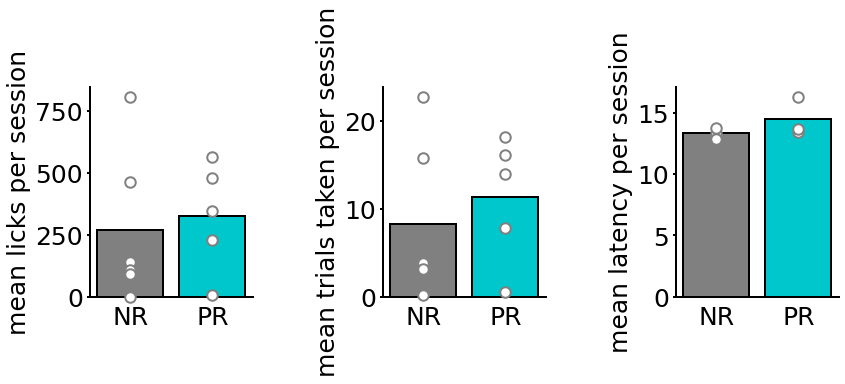

In [504]:
colors_NR = ["grey"]
colors_PR = ["#00C7CC"]

f,ax=plt.subplots(figsize=(16,4), ncols=3)
f.subplots_adjust(wspace=0.8, bottom=0.15, left=0.25)

tp.barscatter([NR_Licks_per_Session_all, PR_Licks_per_Session_all], 
              barlabels=["NR", "PR"],
              barfacecolor = ["grey", "#00C7CC"],
              barlabeloffset=0.04,
              barfacecoloroption="individual",
              xfontsize = 25,
              scattersize=110,
              scatteralpha=0.6,
              linewidth=2,
              scatterlinecolor= colors_lines,
              ax=ax[0])

tp.barscatter([NR_hits_all, PR_hits_all], 
              barlabels=["NR", "PR"],
              barfacecolor = ["grey", "#00C7CC"],
              barlabeloffset=0.04,
              barfacecoloroption="individual",
              xfontsize = 25,
              scattersize=110,
              scatteralpha=0.6,
              linewidth=2,
              scatterlinecolor= colors_lines,
              ax=ax[1])

tp.barscatter([remove_nans(NR_mean_latency_all), remove_nans(PR_mean_latency_all)], 
              barlabels=["NR", "PR"],
              barfacecolor = ["grey", "#00C7CC"],
              barlabeloffset=0.04,
              barfacecoloroption="individual",
              xfontsize = 25,
              scattersize=110,
              scatteralpha=0.6,
              linewidth=2,
              scatterlinecolor= colors_lines,
              ax=ax[2])

ax[0].set_ylabel("mean licks per session", fontsize = 25)
ax[0].tick_params(axis='y', labelsize=25)

ax[1].set_ylabel("mean trials taken per session", fontsize = 25)
ax[1].tick_params(axis='y', labelsize=25)

ax[2].set_ylabel("mean latency per session", fontsize = 25)
ax[2].tick_params(axis='y', labelsize=25)


In [427]:
colors_NR1 = "#EAEAEA"
colors_NR2 = "#B0B0B1"
colors_NR3 = "#6D6D6D"

colors_PR1 = "#CCF3F4"
colors_PR2 = "#00C7CC"
colors_PR3 = "#0097A3"

colors_lines = "#6e6e6e"

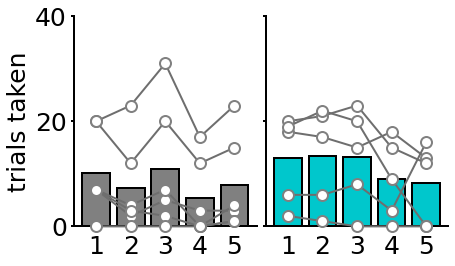

In [510]:
#HITS PER SESSION

colors_NR = ["grey"]
colors_PR = ["#00C7CC"]

f,ax=plt.subplots(figsize=(8,4), ncols=2, sharey=True)
f.subplots_adjust(wspace=0.05, bottom=0.15, left=0.25)

tp.barscatter([NR_hits_1, NR_hits_2, NR_hits_3, NR_hits_4, NR_hits_5], 
              paired= True,
              barlabels=["1", "2", "3", "4", "5"],
              barfacecolor = colors_NR,
              barlabeloffset=0.04,
              #barfacecoloroption="individual",
              xfontsize = 25,
              scattersize=110,
              scatteralpha=0.6,
              linewidth=2,
              scatterlinecolor= colors_lines,
              ax=ax[0])

tp.barscatter([PR_hits_1, PR_hits_2, PR_hits_3, PR_hits_4, PR_hits_5], 
              paired= True,
              barlabels=["1", "2", "3", "4", "5"],
              barfacecolor = colors_PR,
              barlabeloffset=0.04,
              #barfacecoloroption="individual",
              xfontsize = 25,
              scattersize=110,
              scatteralpha=0.6,
              linewidth=2,
              scatterlinecolor= colors_lines,
              ax=ax[1])

ax[0].set_ylabel("trials taken", fontsize = 25)
ax[0].tick_params(axis='y', labelsize=25)
ax[0].set_ylim([0, 40])
ax[0].set_yticks([0, 20, 40])
ax[0].set_yticklabels(["0", "20", "40"])


#ax[0].set_title("NR")
#ax[1].set_title("PR")

f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Conferences\\2022 MMiN\\poster\\figures\\trials_per_session.pdf")

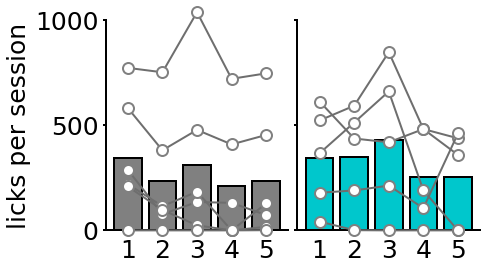

In [429]:
#LICKS PER SESSION

colors_NR = ["grey"]
colors_PR = ["#00C7CC"]

f,ax=plt.subplots(figsize=(8,4), ncols=2, sharey=True)
f.subplots_adjust(wspace=0.05, bottom=0.15, left=0.25)

tp.barscatter([NR_Licks_per_Session_1, NR_Licks_per_Session_2, NR_Licks_per_Session_3, NR_Licks_per_Session_4, NR_Licks_per_Session_5], 
              paired= True,
              barlabels=["1", "2", "3", "4", "5"],
              barfacecolor = colors_NR,
              barlabeloffset=0.04,
              #barfacecoloroption="individual",
              xfontsize = 25,
              scattersize=110,
              scatteralpha=0.6,
              linewidth=2,
              scatterlinecolor= colors_lines,
              ax=ax[0])

tp.barscatter([PR_Licks_per_Session_1, PR_Licks_per_Session_2, PR_Licks_per_Session_3, PR_Licks_per_Session_4, PR_Licks_per_Session_5], 
              paired= True,
              barlabels=["1", "2", "3", "4", "5"],
              barfacecolor = colors_PR,
              barlabeloffset=0.04,
              #barfacecoloroption="individual",
              xfontsize = 25,
              scattersize=110,
              scatteralpha=0.6,
              linewidth=2,
              scatterlinecolor= colors_lines,
              ax=ax[1])

ax[0].set_ylabel("licks per session", fontsize = 25)
ax[0].tick_params(axis='y', labelsize=25)
ax[0].set_ylim([0, 1000])
ax[0].set_yticks([0, 500, 1000])
ax[0].set_yticklabels(["0", "500", "1000"])

#ax[0].set_title("NR")
#ax[1].set_title("PR")
f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Conferences\\2022 MMiN\\poster\\figures\\licks_per_session.pdf")

C:\Users\kvo019\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


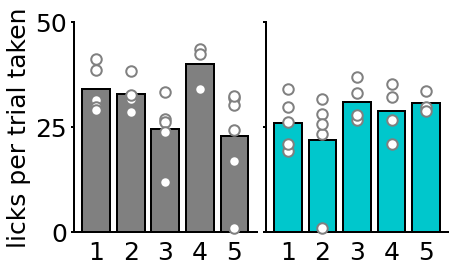

In [439]:
#LICKS PER TRIALS TAKEN
#gives error for paired=True because some individuals didnt lick on some sessions

colors_NR = ["grey"]
colors_PR = ["#00C7CC"]

f,ax=plt.subplots(figsize=(8,4), ncols=2, sharey=True)
f.subplots_adjust(wspace=0.05, bottom=0.15, left=0.25)

tp.barscatter([NR_licks_per_trial_taken_1, NR_licks_per_trial_taken_2, NR_licks_per_trial_taken_3, NR_licks_per_trial_taken_4, NR_licks_per_trial_taken_5], 
              #paired= True,
              unequal = True,
              barlabels=["1", "2", "3", "4", "5"],
              barlabeloffset=0.04,
              barfacecolor = colors_NR,
              #barfacecoloroption="individual",
              xfontsize = 25,
              scattersize=110,
              scatteralpha=0.6,
              linewidth=2,
              scatterlinecolor= colors_lines,
              ax=ax[0])

tp.barscatter([PR_licks_per_trial_taken_1, PR_licks_per_trial_taken_2, PR_licks_per_trial_taken_3, PR_licks_per_trial_taken_4, PR_licks_per_trial_taken_5], 
              #paired= True,
              barlabels=["1", "2", "3", "4", "5"],
              barlabeloffset=0.04,
              barfacecolor = colors_PR,
              #barfacecoloroption="individual",
              xfontsize = 25,
              scattersize=110,
              scatteralpha=0.6,
              linewidth=2,
              scatterlinecolor= colors_lines,
              ax=ax[1])

ax[0].set_ylabel("licks per trial taken", fontsize = 25)
ax[0].tick_params(axis='y', labelsize=25)

ax[0].set_ylim([0, 50])
ax[0].set_yticks([0, 25, 50])
ax[0].set_yticklabels(["0", "25", "50"])

#ax[0].set_title("NR")
#ax[1].set_title("PR")

f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Conferences\\2022 MMiN\\poster\\figures\\licks_per_trial.pdf")

C:\Users\kvo019\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


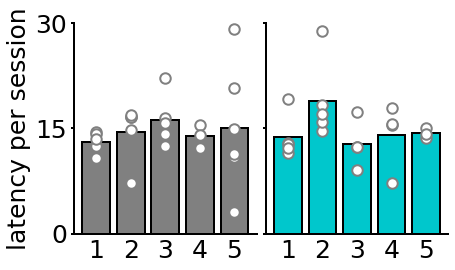

In [454]:
#LATENCY PER SESSION
colors_NR = ["grey"]
colors_PR = ["#00C7CC"]

colors_NR = ["grey"]
colors_PR = ["#00C7CC"]

f,ax=plt.subplots(figsize=(8,4), ncols=2, sharey=True)
f.subplots_adjust(wspace=0.05, bottom=0.15, left=0.25)

tp.barscatter([remove_nans(NR_mean_latency_1), remove_nans(NR_mean_latency_2), remove_nans(NR_mean_latency_3), remove_nans(NR_mean_latency_4), NR_mean_latency_5], 
              #paired= True,
              unequal = True,
              barlabels=["1", "2", "3", "4", "5"],
              barfacecolor = colors_NR,
              #barfacecoloroption="individual",
              xfontsize = 25,
              scattersize=110,
              scatteralpha=0.6,
              linewidth=2,
              scatterlinecolor= colors_lines,
              ax=ax[0])

tp.barscatter([PR_mean_latency_1, PR_mean_latency_2, remove_nans(PR_mean_latency_3), remove_nans(PR_mean_latency_4), remove_nans(PR_mean_latency_5)], 
              #paired= True,
              unequal= True,
              barlabels=["1", "2", "3", "4", "5"],
              barfacecolor = colors_PR,
              #barfacecoloroption="individual",
              xfontsize = 25,
              scattersize=110,
              scatteralpha=0.6,
              linewidth=2,
              scatterlinecolor= colors_lines,
              ax=ax[1])

ax[0].set_ylabel("latency per session", fontsize = 25)
ax[0].tick_params(axis='y', labelsize=25)

ax[0].set_ylim([0, 30])
ax[0].set_yticks([0, 15, 30])
ax[0].set_yticklabels(["0", "15", "30"])

#ax[0].set_title("NR")
#ax[1].set_title("PR")

f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Conferences\\2022 MMiN\\poster\\figures\\latency_per_session.pdf")

In [ ]:
NR_cumulative_1 = []
NR_cumulative_2 = []
NR_cumulative_3 = []
NR_cumulative_4 = []
NR_cumulative_5 = []

PR_cumulative_1 = []
PR_cumulative_2 = []
PR_cumulative_3 = []
PR_cumulative_4 = []
PR_cumulative_5 = []


bins=range(0,3601,5)

#session 1
for mouse in NR_all: 
    temp_licks = []
    temp_histodata = []
    temp_cumulative_licks = [] 
    for row in rows:
        if (row[2] == mouse) and (row[6] == 1):
            [onset, offset]=tp.medfilereader(datafolder+row[1], varsToExtract=["e", "f"],  remove_var_header=True)
            lickdata = tp.lickCalc(onset, offset=offset)
            temp_licks.append(lickdata["licks"])
            
        temp_histodata = np.histogram(temp_licks, bins=bins)
        temp_cumulative_licks = np.concatenate([np.zeros(1), np.cumsum(temp_histodata[0])])
    NR_cumulative_1.append(temp_cumulative_licks)
    
for mouse in PR_all: 
    temp_licks = []
    temp_histodata = []
    temp_cumulative_licks = [] 
    for row in rows:
        if (row[2] == mouse) and (row[6] == 1):
            [onset, offset]=tp.medfilereader(datafolder+row[1], varsToExtract=["e", "f"],  remove_var_header=True)
            lickdata = tp.lickCalc(onset, offset=offset)
            temp_licks.append(lickdata["licks"])
            
        temp_histodata = np.histogram(temp_licks, bins=bins)
        temp_cumulative_licks = np.concatenate([np.zeros(1), np.cumsum(temp_histodata[0])])
    PR_cumulative_1.append(temp_cumulative_licks)

    
#session 2
for mouse in NR_all: 
    temp_licks = []
    temp_histodata = []
    temp_cumulative_licks = [] 
    for row in rows:
        if (row[2] == mouse) and (row[6] == 2):
            [onset, offset]=tp.medfilereader(datafolder+row[1], varsToExtract=["e", "f"],  remove_var_header=True)
            lickdata = tp.lickCalc(onset, offset=offset)
            temp_licks.append(lickdata["licks"])
            
        temp_histodata = np.histogram(temp_licks, bins=bins)
        temp_cumulative_licks = np.concatenate([np.zeros(1), np.cumsum(temp_histodata[0])])
    NR_cumulative_2.append(temp_cumulative_licks)
    
for mouse in PR_all: 
    temp_licks = []
    temp_histodata = []
    temp_cumulative_licks = [] 
    for row in rows:
        if (row[2] == mouse) and (row[6] == 2):
            [onset, offset]=tp.medfilereader(datafolder+row[1], varsToExtract=["e", "f"],  remove_var_header=True)
            lickdata = tp.lickCalc(onset, offset=offset)
            temp_licks.append(lickdata["licks"])
            
        temp_histodata = np.histogram(temp_licks, bins=bins)
        temp_cumulative_licks = np.concatenate([np.zeros(1), np.cumsum(temp_histodata[0])])
    PR_cumulative_2.append(temp_cumulative_licks)
    
    
#session 3
for mouse in NR_all: 
    temp_licks = []
    temp_histodata = []
    temp_cumulative_licks = [] 
    for row in rows:
        if (row[2] == mouse) and (row[6] == 3):
            [onset, offset]=tp.medfilereader(datafolder+row[1], varsToExtract=["e", "f"],  remove_var_header=True)
            lickdata = tp.lickCalc(onset, offset=offset)
            temp_licks.append(lickdata["licks"])
            
        temp_histodata = np.histogram(temp_licks, bins=bins)
        temp_cumulative_licks = np.concatenate([np.zeros(1), np.cumsum(temp_histodata[0])])
    NR_cumulative_3.append(temp_cumulative_licks)
    
for mouse in PR_all: 
    temp_licks = []
    temp_histodata = []
    temp_cumulative_licks = [] 
    for row in rows:
        if (row[2] == mouse) and (row[6] == 3):
            [onset, offset]=tp.medfilereader(datafolder+row[1], varsToExtract=["e", "f"],  remove_var_header=True)
            lickdata = tp.lickCalc(onset, offset=offset)
            temp_licks.append(lickdata["licks"])
            
        temp_histodata = np.histogram(temp_licks, bins=bins)
        temp_cumulative_licks = np.concatenate([np.zeros(1), np.cumsum(temp_histodata[0])])
    PR_cumulative_3.append(temp_cumulative_licks)
    
#session 4
for mouse in NR_all: 
    temp_licks = []
    temp_histodata = []
    temp_cumulative_licks = [] 
    for row in rows:
        if (row[2] == mouse) and (row[6] == 4):
            [onset, offset]=tp.medfilereader(datafolder+row[1], varsToExtract=["e", "f"],  remove_var_header=True)
            lickdata = tp.lickCalc(onset, offset=offset)
            temp_licks.append(lickdata["licks"])
            
        temp_histodata = np.histogram(temp_licks, bins=bins)
        temp_cumulative_licks = np.concatenate([np.zeros(1), np.cumsum(temp_histodata[0])])
    NR_cumulative_4.append(temp_cumulative_licks)
    
for mouse in PR_all: 
    temp_licks = []
    temp_histodata = []
    temp_cumulative_licks = [] 
    for row in rows:
        if (row[2] == mouse) and (row[6] == 4):
            [onset, offset]=tp.medfilereader(datafolder+row[1], varsToExtract=["e", "f"],  remove_var_header=True)
            lickdata = tp.lickCalc(onset, offset=offset)
            temp_licks.append(lickdata["licks"])
            
        temp_histodata = np.histogram(temp_licks, bins=bins)
        temp_cumulative_licks = np.concatenate([np.zeros(1), np.cumsum(temp_histodata[0])])
    PR_cumulative_4.append(temp_cumulative_licks)
    
#session 5
for mouse in NR_all: 
    temp_licks = []
    temp_histodata = []
    temp_cumulative_licks = [] 
    for row in rows:
        if (row[2] == mouse) and (row[6] == 5):
            [onset, offset]=tp.medfilereader(datafolder+row[1], varsToExtract=["e", "f"],  remove_var_header=True)
            lickdata = tp.lickCalc(onset, offset=offset)
            temp_licks.append(lickdata["licks"])
            
        temp_histodata = np.histogram(temp_licks, bins=bins)
        temp_cumulative_licks = np.concatenate([np.zeros(1), np.cumsum(temp_histodata[0])])
    NR_cumulative_5.append(temp_cumulative_licks)
    
for mouse in PR_all: 
    temp_licks = []
    temp_histodata = []
    temp_cumulative_licks = [] 
    for row in rows:
        if (row[2] == mouse) and (row[6] == 5):
            [onset, offset]=tp.medfilereader(datafolder+row[1], varsToExtract=["e", "f"],  remove_var_header=True)
            lickdata = tp.lickCalc(onset, offset=offset)
            temp_licks.append(lickdata["licks"])
            
        temp_histodata = np.histogram(temp_licks, bins=bins)
        temp_cumulative_licks = np.concatenate([np.zeros(1), np.cumsum(temp_histodata[0])])
    PR_cumulative_5.append(temp_cumulative_licks)

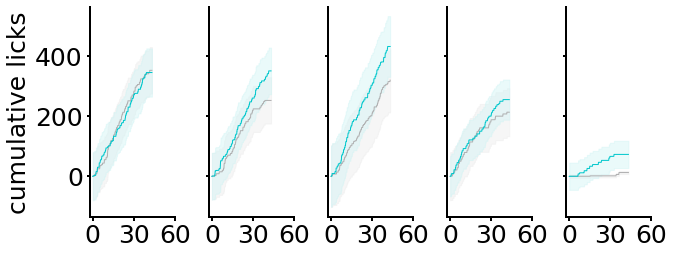

In [511]:
f,ax=plt.subplots(figsize=(12,4), ncols=5, sharey=True)
f.subplots_adjust(wspace=0.4, bottom=0.15, left=0.25)

tp.shadedError(ax[0], NR_cumulative_1, linecolor=colors_NR2, errorcolor=colors_NR1, linewidth=4)
tp.shadedError(ax[0], PR_cumulative_1, linecolor=colors_PR2, errorcolor=colors_PR1)

tp.shadedError(ax[1], NR_cumulative_2, linecolor=colors_NR2, errorcolor=colors_NR1)
tp.shadedError(ax[1], PR_cumulative_2, linecolor=colors_PR2, errorcolor=colors_PR1)

tp.shadedError(ax[2], NR_cumulative_3, linecolor=colors_NR2, errorcolor=colors_NR1)
tp.shadedError(ax[2], PR_cumulative_3, linecolor=colors_PR2, errorcolor=colors_PR1)

tp.shadedError(ax[3], NR_cumulative_4, linecolor=colors_NR2, errorcolor=colors_NR1)
tp.shadedError(ax[3], PR_cumulative_4, linecolor=colors_PR2, errorcolor=colors_PR1)

tp.shadedError(ax[4], NR_cumulative_5, linecolor=colors_NR2, errorcolor=colors_NR1)
tp.shadedError(ax[4], PR_cumulative_5, linecolor=colors_PR2, errorcolor=colors_PR1)



ax[0].set_xticks([0,500, 1000])
ax[0].set_xticklabels(["0", "30", "60"])
ax[1].set_xticks([0,500, 1000])
ax[1].set_xticklabels(["0", "30", "60"])
ax[2].set_xticks([0,500, 1000])
ax[2].set_xticklabels(["0", "30", "60"])
ax[3].set_xticks([0,500, 1000])
ax[3].set_xticklabels(["0", "30", "60"])
ax[4].set_xticks([0,500, 1000])
ax[4].set_xticklabels(["0", "30", "60"])

ax[0].set_ylabel("cumulative licks", fontsize = 25)
#ax[0].set_xlabel("Time (min)")

ax[0].tick_params(labelsize=25, width=2)
ax[1].tick_params(labelsize=25, width=2)
ax[2].tick_params(labelsize=25, width=2)
ax[3].tick_params(labelsize=25, width=2)
ax[4].tick_params(labelsize=25, width=2)

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[3].spines['right'].set_visible(False)
ax[3].spines['top'].set_visible(False)
ax[4].spines['right'].set_visible(False)
ax[4].spines['top'].set_visible(False)

ax[0].spines["bottom"].set_linewidth(2)
ax[1].spines["bottom"].set_linewidth(2)
ax[2].spines["bottom"].set_linewidth(2)
ax[3].spines["bottom"].set_linewidth(2)
ax[4].spines["bottom"].set_linewidth(2)

ax[0].spines["left"].set_linewidth(2)
ax[1].spines["left"].set_linewidth(2)
ax[2].spines["left"].set_linewidth(2)
ax[3].spines["left"].set_linewidth(2)
ax[4].spines["left"].set_linewidth(2)


f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Conferences\\2022 MMiN\\poster\\figures\\cumulative_licks.pdf")


In [ ]:
NR_female_Licks_per_Session_1 = []
NR_female_Licks_per_Trial_1 = []
NR_female_Mean_Licks_per_Trial_1 = []
NR_female_misses_1 = []
NR_female_hits_1 = []
NR_female_latency_1 = []
NR_female_mean_latency_1= []
NR_female_licks_per_trial_taken_1 = []

NR_female_Licks_per_Session_2 = []
NR_female_Licks_per_Trial_2 = []
NR_female_Mean_Licks_per_Trial_2 = []
NR_female_misses_2 = []
NR_female_hits_2 = []
NR_female_latency_2 = []
NR_female_mean_latency_2= []
NR_female_licks_per_trial_taken_2 = []

NR_female_Licks_per_Session_3 = []
NR_female_Licks_per_Trial_3 = []
NR_female_Mean_Licks_per_Trial_3 = []
NR_female_misses_3 = []
NR_female_hits_3 = []
NR_female_latency_3 = []
NR_female_mean_latency_3= []
NR_female_licks_per_trial_taken_3 = []

NR_female_Licks_per_Session_4 = []
NR_female_Licks_per_Trial_4 = []
NR_female_Mean_Licks_per_Trial_4 = []
NR_female_licks_per_trial_taken_4 = []
NR_female_misses_4 = []
NR_female_hits_4 = []
NR_female_latency_4 = []
NR_female_mean_latency_4= []
NR_female_licks_per_trial_taken_4 = []

NR_female_Licks_per_Session_5 = []
NR_female_Licks_per_Trial_5 = []
NR_female_Mean_Licks_per_Trial_5 = []
NR_female_licks_per_trial_taken_5 = []
NR_female_misses_5 = []
NR_female_hits_5 = []
NR_female_latency_5 = []
NR_female_mean_latency_5= []
NR_female_licks_per_trial_taken_5 = []

for mouse in NR_female:
    trials = get_licks_per_trial(mouse, 1)
    NR_female_Mean_Licks_per_Trial_1.append(trials)
    total_licks = sum(trials)
    NR_female_Licks_per_Session_1.append(total_licks)
    
    trial_mean = get_mean_licks_per_trial(mouse, 1)
    NR_female_Mean_Licks_per_Trial_1.append(trial_mean)

    misses = get_misses_per_session(mouse, 1)
    NR_female_misses_1.append(misses)
    
    hits = 40 - misses
    NR_female_hits_1.append(hits)
    
    latency = get_latency_per_trial(mouse, 1)
    NR_female_latency_1.append(latency)
    
    mean_latency = get_mean_latency_per_session(mouse, 1)
    NR_female_mean_latency_1.append(mean_latency)
    
    if hits != 0:
        licks_per_trial_taken = total_licks / hits
        NR_female_licks_per_trial_taken_1.append(licks_per_trial_taken)

for mouse in NR_female:
    trials = get_licks_per_trial(mouse, 2)
    NR_female_Licks_per_Trial_2.append(trials)
    total_licks = sum(trials)
    NR_female_Licks_per_Session_2.append(total_licks)
    
    trial_mean = get_mean_licks_per_trial(mouse, 2)
    NR_female_Mean_Licks_per_Trial_2.append(trial_mean)

    misses = get_misses_per_session(mouse, 2)
    NR_female_misses_2.append(misses)
    
    hits = 40 - misses
    NR_female_hits_2.append(hits)
    
    latency = get_latency_per_trial(mouse, 2)
    NR_female_latency_2.append(latency)
    
    mean_latency = get_mean_latency_per_session(mouse, 2)
    NR_female_mean_latency_2.append(mean_latency)
    
    if hits != 0:
        licks_per_trial_taken = total_licks / hits
        NR_female_licks_per_trial_taken_2.append(licks_per_trial_taken)
    
for mouse in NR_female:
    trials = get_licks_per_trial(mouse, 3)
    NR_female_Licks_per_Trial_3.append(trials)
    total_licks = sum(trials)
    NR_female_Licks_per_Session_3.append(total_licks)
    
    trial_mean = get_mean_licks_per_trial(mouse, 3)
    NR_female_Mean_Licks_per_Trial_3.append(trial_mean)

    misses = get_misses_per_session(mouse, 3)
    NR_female_misses_3.append(misses)
    
    hits = 40 - misses
    NR_female_hits_3.append(hits)

    latency = get_latency_per_trial(mouse, 3)
    NR_female_latency_3.append(latency)
    
    mean_latency = get_mean_latency_per_session(mouse, 3)
    NR_female_mean_latency_3.append(mean_latency)
    
    if hits != 0:
        licks_per_trial_taken = total_licks / hits
        NR_female_licks_per_trial_taken_3.append(licks_per_trial_taken)
    
for mouse in NR_female:
    trials = get_licks_per_trial(mouse, 4)
    NR_female_Licks_per_Trial_4.append(trials)
    total_licks = sum(trials)
    NR_female_Licks_per_Session_4.append(total_licks)
    
    trial_mean = get_mean_licks_per_trial(mouse, 4)
    NR_female_Mean_Licks_per_Trial_4.append(trial_mean)

    misses = get_misses_per_session(mouse, 4)
    NR_female_misses_4.append(misses)
    
    hits = 40 - misses
    NR_female_hits_4.append(hits)
    
    latency = get_latency_per_trial(mouse, 4)
    NR_female_latency_4.append(latency)
    
    mean_latency = get_mean_latency_per_session(mouse, 4)
    NR_female_mean_latency_4.append(mean_latency)
    
    if hits != 0:
        licks_per_trial_taken = total_licks / hits
        NR_female_licks_per_trial_taken_4.append(licks_per_trial_taken)
    
for mouse in NR_female:
    trials = get_licks_per_trial(mouse, 5)
    NR_female_Licks_per_Trial_5.append(trials)
    total_licks = sum(trials)
    NR_female_Licks_per_Session_5.append(total_licks)
    
    trial_mean = get_mean_licks_per_trial(mouse, 5)
    NR_female_Mean_Licks_per_Trial_5.append(trial_mean)

    misses = get_misses_per_session(mouse, 5)
    NR_female_misses_5.append(misses)
    
    hits = 40 - misses
    NR_female_hits_5.append(hits)
    
    latency = get_latency_per_trial(mouse, 5)
    NR_female_latency_5.append(latency)
    
    mean_latency = get_mean_latency_per_session(mouse, 5)
    NR_female_mean_latency_5.append(mean_latency)
    
    if hits != 0:
        licks_per_trial_taken = total_licks / hits
        NR_female_licks_per_trial_taken_5.append(licks_per_trial_taken)
    

In [ ]:
PR_female_Licks_per_Session_1 = []
PR_female_Licks_per_Trial_1 = []
PR_female_Mean_Licks_per_Trial_1 = []
PR_female_misses_1 = []
PR_female_hits_1 = []
PR_female_latency_1 = []
PR_female_mean_latency_1= []
PR_female_licks_per_trial_taken_1 = []

PR_female_Licks_per_Session_2 = []
PR_female_Licks_per_Trial_2 = []
PR_female_Mean_Licks_per_Trial_2 = []
PR_female_misses_2 = []
PR_female_hits_2 = []
PR_female_latency_2 = []
PR_female_mean_latency_2= []
PR_female_licks_per_trial_taken_2 = []

PR_female_Licks_per_Session_3 = []
PR_female_Licks_per_Trial_3 = []
PR_female_Mean_Licks_per_Trial_3 = []
PR_female_misses_3 = []
PR_female_hits_3 = []
PR_female_latency_3 = []
PR_female_mean_latency_3= []
PR_female_licks_per_trial_taken_3 = []

PR_female_Licks_per_Session_4 = []
PR_female_Mean_Licks_per_Trial_4 = []
PR_female_licks_per_trial_taken_4 = []
PR_female_misses_4 = []
PR_female_hits_4 = []
PR_female_latency_4 = []
PR_female_mean_latency_4= []
PR_female_licks_per_trial_taken_4 = []

PR_female_Licks_per_Session_5 = []
PR_female_Mean_Licks_per_Trial_5 = []
PR_female_licks_per_trial_taken_5 = []
PR_female_misses_5 = []
PR_female_hits_5 = []
PR_female_latency_5 = []
PR_female_mean_latency_5= []
PR_female_licks_per_trial_taken_5 = []

for mouse in PR_female:
    trials = get_licks_per_trial(mouse, 1)
    PR_female_Licks_per_Trial_1.append(trials)
    total_licks = sum(trials)
    PR_female_Licks_per_Session_1.append(total_licks)
    
    trial_mean = get_mean_licks_per_trial(mouse, 1)
    PR_female_Mean_Licks_per_Trial_1.append(trial_mean)

    misses = get_misses_per_session(mouse, 1)
    PR_female_misses_1.append(misses)
    
    hits = 40 - misses
    PR_female_hits_1.append(hits)
    
    latency = get_latency_per_trial(mouse, 1)
    PR_female_latency_1.append(latency)
    
    mean_latency = get_mean_latency_per_session(mouse, 1)
    PR_female_mean_latency_1.append(mean_latency)
    
    if hits != 0:
        licks_per_trial_taken = total_licks / hits
        PR_female_licks_per_trial_taken_1.append(licks_per_trial_taken)

for mouse in PR_female:
    trials = get_licks_per_trial(mouse, 2)
    PR_female_Licks_per_Trial_2.append(trials)
    total_licks = sum(trials)
    PR_female_Licks_per_Session_2.append(total_licks)
    
    trial_mean = get_mean_licks_per_trial(mouse, 2)
    PR_female_Mean_Licks_per_Trial_2.append(trial_mean)

    misses = get_misses_per_session(mouse, 2)
    PR_female_misses_2.append(misses)
    
    hits = 40 - misses
    PR_female_hits_2.append(hits)
    
    latency = get_latency_per_trial(mouse, 2)
    PR_female_latency_2.append(latency)
    
    mean_latency = get_mean_latency_per_session(mouse, 2)
    PR_female_mean_latency_2.append(mean_latency)
    
    if hits != 0:
        licks_per_trial_taken = total_licks / hits
        PR_female_licks_per_trial_taken_2.append(licks_per_trial_taken)
    
for mouse in PR_female:
    trials = get_licks_per_trial(mouse, 3)
    PR_female_Licks_per_Trial_3.append(trials)
    total_licks = sum(trials)
    PR_female_Licks_per_Session_3.append(total_licks)
    
    trial_mean = get_mean_licks_per_trial(mouse, 3)
    PR_female_Mean_Licks_per_Trial_3.append(trial_mean)

    misses = get_misses_per_session(mouse, 3)
    PR_female_misses_3.append(misses)
    
    hits = 40 - misses
    PR_female_hits_3.append(hits)

    latency = get_latency_per_trial(mouse, 3)
    PR_female_latency_3.append(latency)
    
    mean_latency = get_mean_latency_per_session(mouse, 3)
    PR_female_mean_latency_3.append(mean_latency)
    
    if hits != 0:
        licks_per_trial_taken = total_licks / hits
        PR_female_licks_per_trial_taken_3.append(licks_per_trial_taken)
    
for mouse in PR_female:
    trials = get_licks_per_trial(mouse, 4)
    PR_female_Licks_per_Trial_4.append(trials)
    total_licks = sum(trials)
    PR_female_Licks_per_Session_4.append(total_licks)
    
    trial_mean = get_mean_licks_per_trial(mouse, 4)
    PR_female_Mean_Licks_per_Trial_4.append(trial_mean)

    misses = get_misses_per_session(mouse, 4)
    PR_female_misses_4.append(misses)
    
    hits = 40 - misses
    PR_female_hits_4.append(hits)
    
    latency = get_latency_per_trial(mouse, 4)
    PR_female_latency_4.append(latency)
    
    mean_latency = get_mean_latency_per_session(mouse, 4)
    PR_female_mean_latency_4.append(mean_latency)
    
    if hits != 0:
        licks_per_trial_taken = total_licks / hits
        PR_female_licks_per_trial_taken_4.append(licks_per_trial_taken)
    
for mouse in PR_female:
    trials = get_licks_per_trial(mouse, 5)
    PR_female_Licks_per_Trial_5.append(trials)
    total_licks = sum(trials)
    PR_female_Licks_per_Session_5.append(total_licks)
    
    trial_mean = get_mean_licks_per_trial(mouse, 5)
    PR_female_Mean_Licks_per_Trial_5.append(trial_mean)

    misses = get_misses_per_session(mouse, 5)
    PR_female_misses_5.append(misses)
    
    hits = 40 - misses
    PR_female_hits_5.append(hits)
    
    latency = get_latency_per_trial(mouse, 5)
    PR_female_latency_5.append(latency)
    
    mean_latency = get_mean_latency_per_session(mouse, 5)
    PR_female_mean_latency_5.append(mean_latency)
    
    if hits != 0:
        licks_per_trial_taken = total_licks / hits
        PR_female_licks_per_trial_taken_5.append(licks_per_trial_taken)

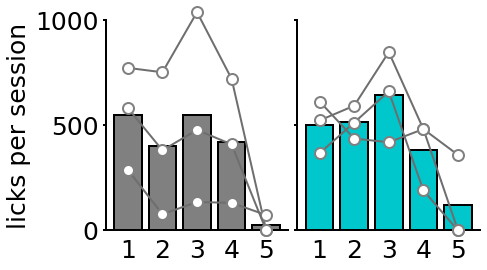

In [512]:
#LICKS PER SESSION, FEMALES ONLY

colors_NR = ["grey"]
colors_PR = ["#00C7CC"]

f,ax=plt.subplots(figsize=(8,4), ncols=2, sharey=True)
f.subplots_adjust(wspace=0.05, bottom=0.15, left=0.25)

tp.barscatter([NR_female_Licks_per_Session_1, NR_female_Licks_per_Session_2, NR_female_Licks_per_Session_3, NR_female_Licks_per_Session_4, NR_female_Licks_per_Session_5], 
              paired= True,
              barlabels=["1", "2", "3", "4", "5"],
              barfacecolor = colors_NR,
              barlabeloffset=0.04,
              #barfacecoloroption="individual",
              xfontsize = 25,
              scattersize=110,
              scatteralpha=0.6,
              linewidth=2,
              scatterlinecolor= colors_lines,
              ax=ax[0])

tp.barscatter([PR_female_Licks_per_Session_1, PR_female_Licks_per_Session_2, PR_female_Licks_per_Session_3, PR_female_Licks_per_Session_4, PR_female_Licks_per_Session_5], 
              paired= True,
              barlabels=["1", "2", "3", "4", "5"],
              barfacecolor = colors_PR,
              barlabeloffset=0.04,
              #barfacecoloroption="individual",
              xfontsize = 25,
              scattersize=110,
              scatteralpha=0.6,
              linewidth=2,
              scatterlinecolor= colors_lines,
              ax=ax[1])

ax[0].set_ylabel("licks per session", fontsize = 25)
ax[0].tick_params(axis='y', labelsize=25)
ax[0].set_ylim([0, 1000])
ax[0].set_yticks([0, 500, 1000])
ax[0].set_yticklabels(["0", "500", "1000"])

#ax[0].set_title("NR")
#ax[1].set_title("PR")
f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Conferences\\2022 MMiN\\poster\\figures\\females_licks_per_session.pdf")

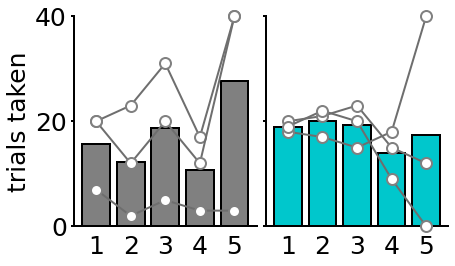

In [513]:
#HITS PER SESSION, FEMALES

colors_NR = ["grey"]
colors_PR = ["#00C7CC"]

f,ax=plt.subplots(figsize=(8,4), ncols=2, sharey=True)
f.subplots_adjust(wspace=0.05, bottom=0.15, left=0.25)

tp.barscatter([NR_female_hits_1, NR_female_hits_2, NR_female_hits_3, NR_female_hits_4, NR_female_hits_5], 
              paired= True,
              barlabels=["1", "2", "3", "4", "5"],
              barfacecolor = colors_NR,
              barlabeloffset=0.04,
              #barfacecoloroption="individual",
              xfontsize = 25,
              scattersize=110,
              scatteralpha=0.6,
              linewidth=2,
              scatterlinecolor= colors_lines,
              ax=ax[0])

tp.barscatter([PR_female_hits_1, PR_female_hits_2, PR_female_hits_3, PR_female_hits_4, PR_female_hits_5], 
              paired= True,
              barlabels=["1", "2", "3", "4", "5"],
              barfacecolor = colors_PR,
              barlabeloffset=0.04,
              #barfacecoloroption="individual",
              xfontsize = 25,
              scattersize=110,
              scatteralpha=0.6,
              linewidth=2,
              scatterlinecolor= colors_lines,
              ax=ax[1])

ax[0].set_ylabel("trials taken", fontsize = 25)
ax[0].tick_params(axis='y', labelsize=25)
ax[0].set_ylim([0, 40])
ax[0].set_yticks([0, 20, 40])
ax[0].set_yticklabels(["0", "20", "40"])


#ax[0].set_title("NR")
#ax[1].set_title("PR")

f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Conferences\\2022 MMiN\\poster\\figures\\females_trials_per_session.pdf")